# Lab | Handling Data Imbalance in Classification Models
For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using files_for_lab/Customer-Churn.csv file.

## Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from statsmodels.formula.api import ols
import statsmodels.api as sm

import warnings 
warnings.filterwarnings('ignore')

- Read that data into Python and call the dataframe churnData.

In [2]:
churnData = pd.read_csv('Customer-Churn.csv')
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [3]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [4]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'],errors='coerce')

- Check for null values in the dataframe. Replace the null values.

In [5]:
churnData['TotalCharges'].value_counts()

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64

In [6]:
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
churnData['TotalCharges'] = churnData['TotalCharges'].interpolate(method='nearest')
churnData.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges: 
Note: So far we have not balanced the data.

In [8]:
features = churnData[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]
features

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


1. Scale the features either by using normalizer or a standard scaler.

<AxesSubplot:ylabel='Density'>

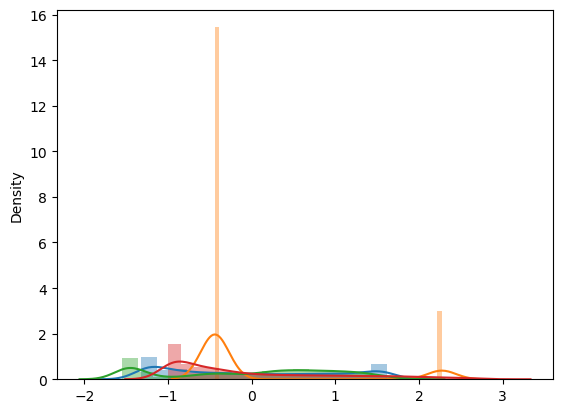

In [9]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(features)
x_StaSca = transformer.transform(features)
sns.distplot(x_StaSca.T[0])
sns.distplot(x_StaSca.T[1])
sns.distplot(x_StaSca.T[2])
sns.distplot(x_StaSca.T[3])

2. Split the data into a training set and a test set.

In [116]:
from sklearn.model_selection import train_test_split

X = x_StaSca
y = churnData['Churn'].replace('Yes', 1).replace('No', 0)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =100)

3. Fit a logistic regression model on the training data.

In [117]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions_LR = model.predict(X_test)
score_LR = model.score(X_test, y_test)

4. Check the accuracy on the test data.

In [118]:
predictions_LR

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [119]:
score_LR

0.780407004259347

- Managing imbalance in the dataset

1. Check for the imbalance.

In [120]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

2. Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.

In [137]:
from imblearn.over_sampling import SMOTE

# X = numerical #pd.concat([numerical, categorical], axis=1)
X = x_StaSca
y = churnData['Churn']
smote = SMOTE()

In [139]:
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [138]:
X_sm, y_sm = smote.fit_resample(X,y)

In [140]:
y_sm.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [142]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy= 'not minority')
X_rus, y_rus = tl.fit_resample(X,y)
y_rus.value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

3. Each time fit the model and see how the accuracy of the model is.

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size = 0.3, random_state =100)

In [144]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions_LR = model.predict(X_test)
score_LR = model.score(X_test, y_test)

In [146]:
score_LR

0.7526570048309179

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus, test_size = 0.3, random_state =100)

In [148]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions_LR = model.predict(X_test)
score_LR = model.score(X_test, y_test)

In [149]:
score_LR

0.7174688057040999